In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

home = os.environ['HOME'] # if the HOME variable is set to '/Users/lou', we are on Lou's mac, else Github
if home == '/Users/lou':
    filename = '/Users/lou/GITHubProjects/Thinkful/Datafiles/planecrashinfo_20181121001952_clean.csv'
else:
    filename = 'planecrashinfo_20181121001952_clean.csv'
    
crashes_df = pd.read_csv(filename)

# let's remove all the NaN's for the numeric data types
crashes_df = crashes_df.dropna(subset=['aboard_count'])
crashes_df = crashes_df.dropna(subset=['fatal_count'])  
crashes_df = crashes_df.dropna(subset=['ground'])

# let's strip off all leading and trailing spaces from the numeric data types
crashes_df = crashes_df[(crashes_df['aboard_count'].str.strip() != '?')] # remove unknown aboard_cont
crashes_df = crashes_df[(crashes_df['ground'].str.strip()       != '?')] # remove unknown ground count
crashes_df = crashes_df[(crashes_df['fatal_count'].str.strip()  != '?')] # remove unknown fatal_count

# let's convert all of these numeric data types to numerics
crashes_df['ground']       = pd.to_numeric(crashes_df['ground'])
crashes_df['aboard_count'] = pd.to_numeric(crashes_df['aboard_count'])
crashes_df['fatal_count']  = pd.to_numeric(crashes_df['fatal_count'])
crashes_df['crashdate'] =    pd.to_datetime(crashes_df['crashdate'])
crashes_df['crashyear'] =    crashes_df['crashdate'].dt.year


FATALITIES = 150
# we only want big crashes, more than n fatalties
crashes_big = crashes_df[(crashes_df['fatal_count']  > FATALITIES)]
crashes_df = crashes_big
crashes_df.index.name = None
crashes_df['dayofweek'] = crashes_df['crashdate'].dt.dayofweek

# crashes_df_ac_type for Boeing B-747
crashes_df_ac_type = crashes_df[(crashes_df['ac_type'].str.startswith('Boeing B-747'))]
crashes_df_ac_type.sort_values(['ac_type', 'fatal_count'],ascending=True) # sort it
crashes_df_ac_type_avg = crashes_df_ac_type.groupby('ac_type')[['country_code','fatal_count', 'ground', 'aboard_count','crashyear', 'operator_code']].mean()

## Let's ask the question:  Have we been seeing fewer fatal crashes over 150 passengers since 1980?

Text(0, 0.5, 'Fatal Count')

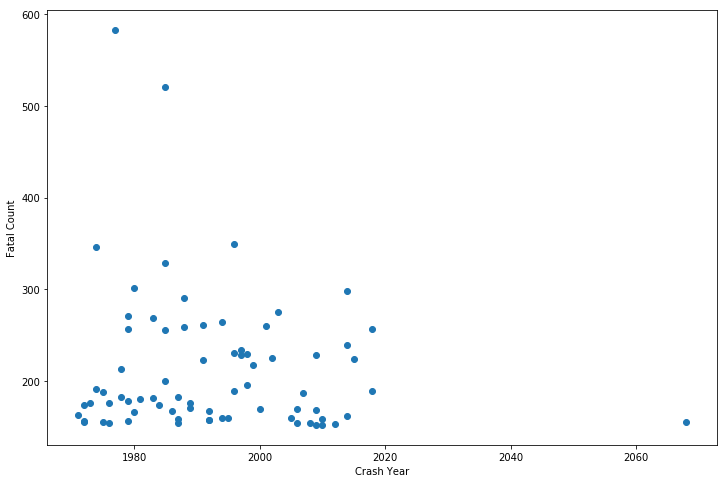

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(crashes_df['crashyear'], crashes_df['fatal_count'])
plt.xlabel('Crash Year')
plt.ylabel('Fatal Count')

## Let's ask the question is Aboard count and Fatal count positively correlated?

Text(0, 0.5, 'Fatal Count')

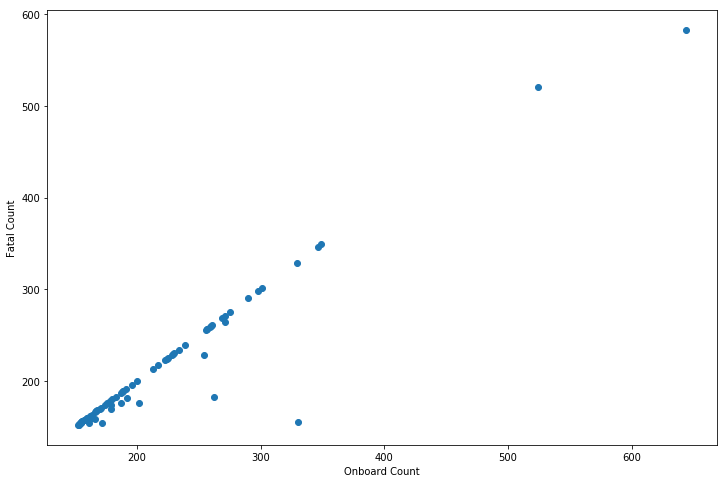

In [8]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(crashes_df['aboard_count'], crashes_df['fatal_count'])

plt.xlabel('Onboard Count')
plt.ylabel('Fatal Count')

## Let's ask the question:  Which day of the week is the most likely to have a higher fatality?
### Monday = 0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, and Sunday=6

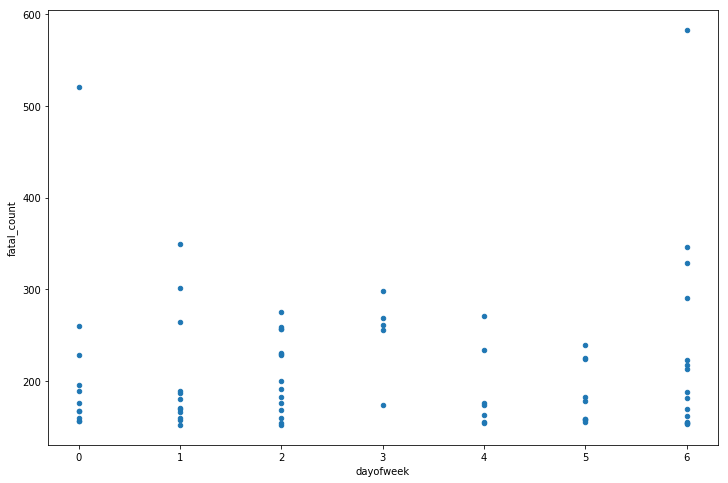

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
crashes_df.plot(kind='scatter', x='dayofweek',y= 'fatal_count')
plt.show()

In [6]:
## Let's ask the question:  Is the ratio of fatal crash count to onboard count going down over time?

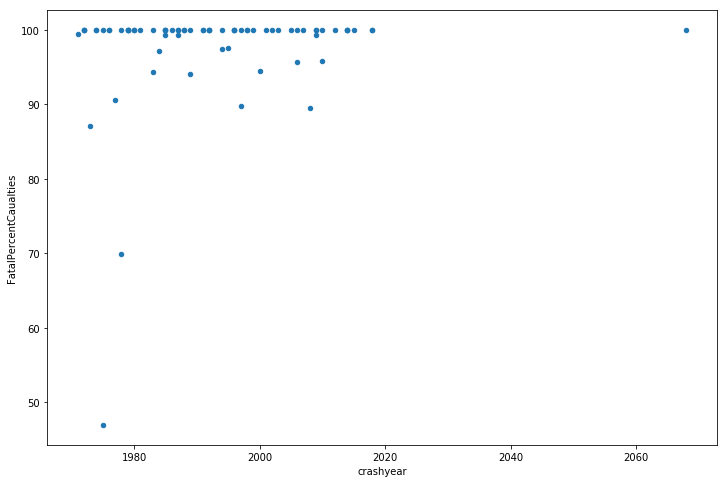

In [54]:
plt.rcParams['figure.figsize'] = [12, 8]
crashes_df2 = pd.DataFrame()

crashes_df2['crashyear'] = crashes_df['crashyear']

crashes_df2['FatalPercentCaualties'] = crashes_df['fatal_count'].astype('float') / crashes_df['aboard_count'].astype('float')*100.0

crashes_df2.plot(kind='scatter', x='crashyear', y='FatalPercentCaualties')
plt.show()